<a href="https://colab.research.google.com/github/DimitrisParaskevopoulos/Basic-projects-on-classification-and-regression/blob/main/classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Classification project for TITANIC using neural networks** 

# Libraries, importing data and quick review of data

In [ ]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [ ]:
test_df = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv")
train_df = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")

In [ ]:
train_df.info()  #check for numeric data or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe() #check distribution of numerical features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.describe(include=['O']) #check distribution of categorical features

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hood, Mr. Ambrose Jr",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False) #check for null values
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [ ]:
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


# EDA

## Analyze by pivoting features

In [ ]:
#Pivoting is used to see correlation between categorical(but not objects) and target value

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
# Except for groupby we can use pivot_table. Its exactly the same.

In [ ]:
pd.pivot_table(train_df, index = 'Parch', values = 'Survived').sort_values('Survived', ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


##Analyze by visualizing data

Correlating numerical features

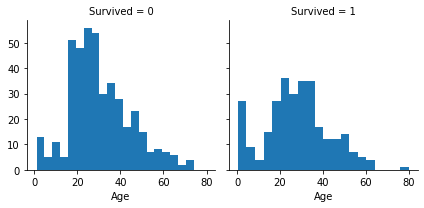

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Correlating numerical and ordinal features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


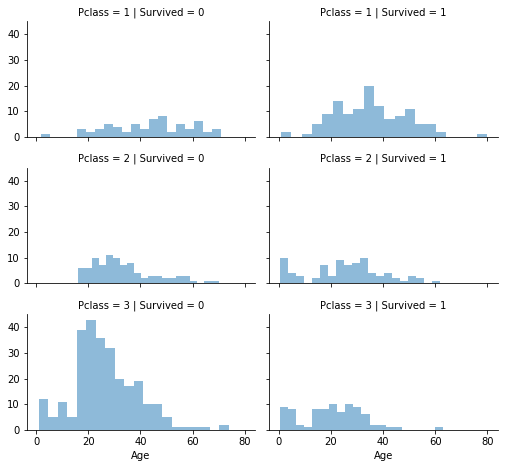

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Correlating categorical features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


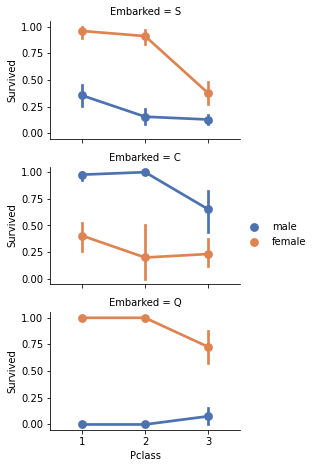

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Correlating categorical and numerical features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


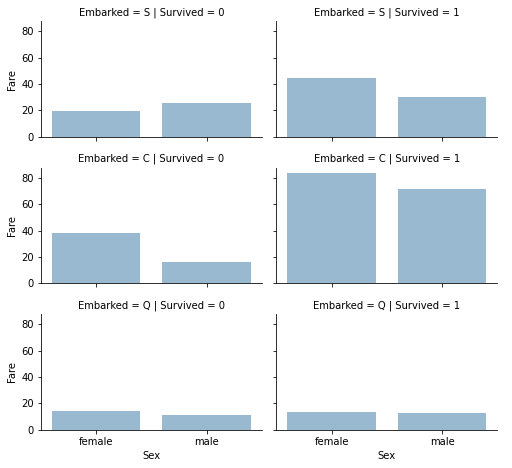

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Data Preprocessing

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0,'not_alone'] = 0 
    dataset.loc[dataset['relatives'] == 0,'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [ ]:
#useless data
train_df = train_df.drop(['PassengerId'], axis=1)

## Extract knowledge from feature

In [ ]:
#cabin
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

In [ ]:
#use of map and apply
# apply() is used to apply a function along an axis of the DataFrame or on values of Series. applymap() is used to apply 
#a function to a DataFrame elementwise. 
# map() is used to substitute each value in a Series with another value
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)  #convert in numbers with dict kai map.map elementwise is the key
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 
dataset['Deck']

0      8
1      8
2      8
3      8
4      8
      ..
413    8
414    3
415    8
416    8
417    8
Name: Deck, Length: 418, dtype: int64

In [ ]:
#we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

## Fill NAN values

In [ ]:
#we can tackle the issue with the age features missing values. I will create an array that contains random numbers,
#which are computed based on the mean age value in regards to the standard deviation and is_null.
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [ ]:
#fillna with most common value
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
#fillna with 0
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

## Extract knowledge from feature and convert categorical to numerical

In [ ]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers xaris map
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

## Convert categorical to numerical

In [ ]:
#Convert categorical to numerical for sex attribute
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [ ]:
#Convert categorical to numerical for Embarked attribute
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

## Grouping the real numerical features

In [ ]:
#Grouping age attribute
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [ ]:
#Grouping fare attribute
data = [train_df, test_df]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

## Make new features

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [ ]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [ ]:
# Let's take a last look at the training set, before we start training the models.
#All values have to be mumeric. 
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,5,0,0,1,2,0,1,8,1,15,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


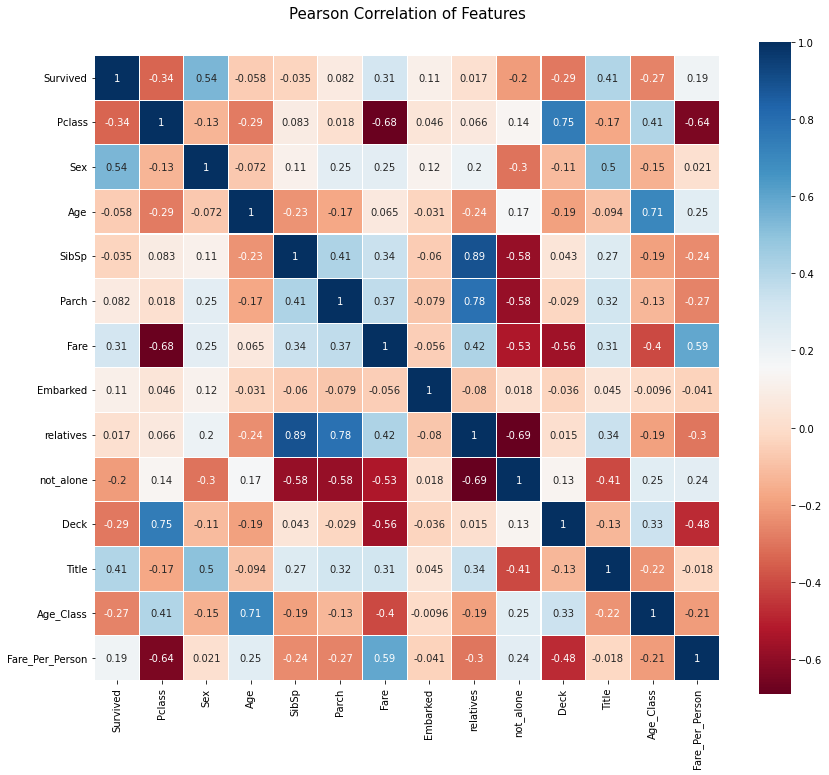

In [ ]:
#heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Build neural network

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
X = train_df.drop("Survived", axis=1)
Y = train_df["Survived"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# apply minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,1.000000,0.000,0.000000,0.4,0.0,0.0,1.0,0.375,0.00,0.333333,0.4
1,0.5,0.0,0.500000,0.000,0.000000,0.2,0.0,0.0,1.0,1.000,0.00,0.333333,0.2
2,1.0,0.0,0.666667,0.000,0.000000,0.0,0.0,0.0,1.0,1.000,0.00,0.666667,0.0
3,1.0,0.0,0.500000,0.125,0.000000,0.0,0.0,0.1,0.0,1.000,0.00,0.500000,0.0
4,1.0,1.0,0.000000,0.500,0.333333,0.4,0.0,0.6,0.0,1.000,0.25,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.0,1.0,0.333333,0.000,0.000000,0.0,0.0,0.0,1.0,1.000,0.25,0.333333,0.0
708,0.0,0.0,0.833333,0.000,0.000000,0.4,0.0,0.0,1.0,1.000,0.00,0.277778,0.4
709,1.0,0.0,1.000000,0.250,0.000000,0.2,0.0,0.2,0.0,1.000,0.00,1.000000,0.0
710,0.0,1.0,0.166667,0.125,0.333333,0.8,0.0,0.3,0.0,0.250,0.25,0.055556,0.2


In [ ]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (712, 13)
X_test : (179, 13)
y_train : (712,)
y_test : (179,)


## Start experiments

experiment 1

In [ ]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([ 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy, # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=10,
                        validation_data=(X_test, y_test)) # see how the model performs on the test set during training

Epoch 1/10
23/23 [==============================] - 1s 9ms/step - loss: 0.6276 - accuracy: 0.6236 - val_loss: 0.6296 - val_accuracy: 0.5866
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.6306 - val_loss: 0.6069 - val_accuracy: 0.6145
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.6517 - val_loss: 0.5891 - val_accuracy: 0.6648
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.6966 - val_loss: 0.5759 - val_accuracy: 0.6816
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.7261 - val_loss: 0.5650 - val_accuracy: 0.7095
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.5465 - accuracy: 0.7458 - val_loss: 0.5555 - val_accuracy: 0.7207
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.7598 - val_loss: 0.5474 - val_accuracy: 0.7263
Epoch 8/10
23/23 [==

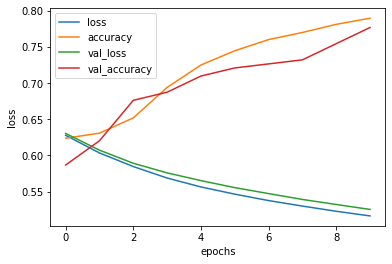

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

experiment 2

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([ 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy, # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=100,
                        validation_data=(X_test, y_test),  # see how the model performs on the test set during training
                        verbose=0 )

In [ ]:
# evaluate
model_2_loss, model_2_accuracy = model_2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.7877


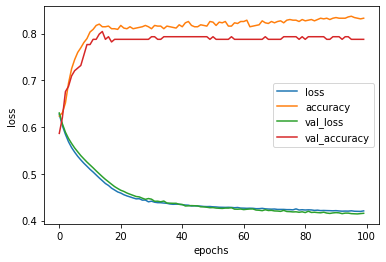

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
# There is no improvment if we train for more epochs. So we will try more complex architecture.

experiment 3

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([ 
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy, # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(X_train,
                        y_train,
                        epochs=10,
                        validation_data=(X_test, y_test),  # see how the model performs on the test set during training
                        verbose=0 )

In [ ]:
# evaluate
model_3_loss, model_3_accuracy = model_3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.8045


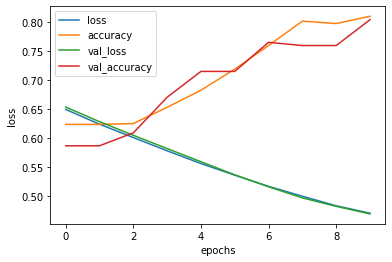

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
# We have almost perfect fit in the curves

In [ ]:
# If we train for 100 epochs, we will have problem of underfitting.

experiment 4

In [ ]:
# Fit for longer. Ideally epochs after experimentation are 20.
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([ 
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy, # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(X_train,
                        y_train,
                        epochs=20,
                        validation_data=(X_test, y_test),  # see how the model performs on the test set during training
                        verbose=0 )

In [ ]:
# evaluate
model_4_loss, model_4_accuracy = model_4.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.4294 - accuracy: 0.8268


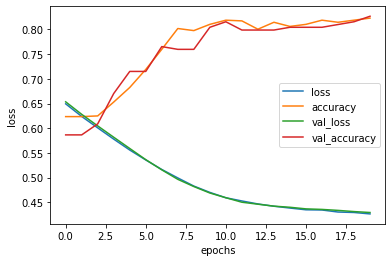

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## Decide ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([ 
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy, # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/25))  # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch 
#pairnei times apo 0.0001 ews 1 etsi opws orizw(me basi epochs)

# Fit the model
history_5 = model_5.fit(X_train,
                        y_train,
                        epochs=100,
                        validation_data=(X_test, y_test),  # see how the model performs on the test set during training
                        verbose=0,
                        callbacks=[lr_scheduler])

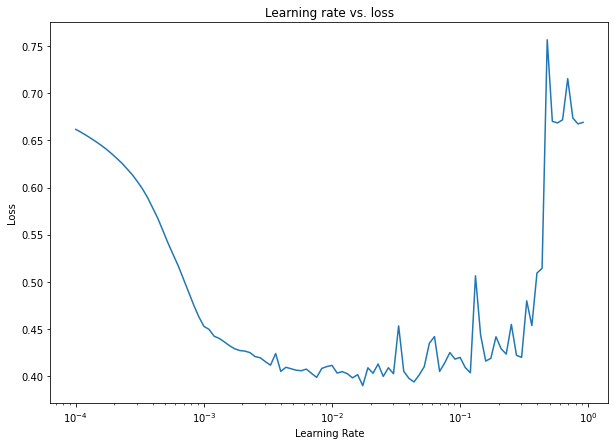

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/25))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_5.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# So we are OK with the default learning rate in 0.001.
# We keep model 4 as it is.

In [ ]:
model_4.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_291 (Dense)            (None, 10)                140       
_________________________________________________________________
dense_292 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_293 (Dense)            (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate model on the test dataset
model_4.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.8268


[0.42905566096305847, 0.826815664768219]

## Confusion matrix

In [ ]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_4.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[91, 14],
       [17, 57]])

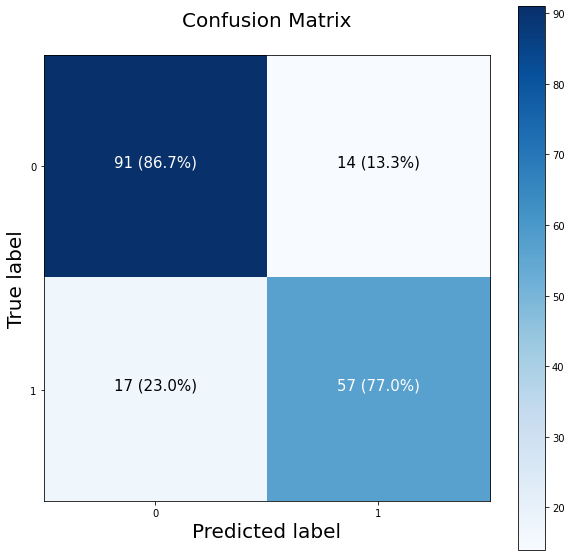

In [ ]:
figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)